In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os.path
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# import plotly library
import plotly.offline as plo
import plotly.graph_objs as go

%matplotlib inline

# customize matplotlib styles
mpl.rc('lines', linewidth=4) # default linewidth
mpl.rc('lines', dash_capstyle='round') # default dashed line capstyle
mpl.rc('lines', solid_capstyle='round') # default solid line capstyle
mpl.rc('xtick', labelsize=20) # default label size for xtick
mpl.rc('ytick', labelsize=20) # default label size for ytick
mpl.rc('axes', titlesize=30) # default title size

# Physical constants

In [2]:
q0 = 1.6e-19 # electron charge in Coulomb
eV = 1.6e-19 # electron volt in Jouls

# Give the input directories as a list

In [3]:
directories = list()

directories.append(os.path.expanduser("~/research/monte_carlo_fiber"))
# directories.append(os.path.expanduser("~/research/monte_carlo_fiber_track_particle"))
# directories.append(os.path.expanduser("~/research/monte_carlo_fiber_particle_track"))

# directories.append(os.path.expanduser("~/research/monte_carlo_davoody_realistic_random_5to20_bids_1.5nm_thick"))
# directories.append(os.path.expanduser("~/research/monte_carlo_davoody_realistic_random_5to20_bids_2nm_thick"))
# directories.append(os.path.expanduser("~/research/monte_carlo_davoody_realistic_random_5to20_bids_2.5nm_thick"))
# directories.append(os.path.expanduser("~/research/monte_carlo_davoody_realistic_random_5to20_bids_3nm_thick"))
# directories.append(os.path.expanduser("~/research/monte_carlo_davoody_realistic_random_5to20_bids_3.5nm_thick"))
# directories.append(os.path.expanduser("~/research/monte_carlo_davoody_realistic_random_5to20_bids_4nm_thick"))

# read the current data

steady state drain current: 1.378147e+28


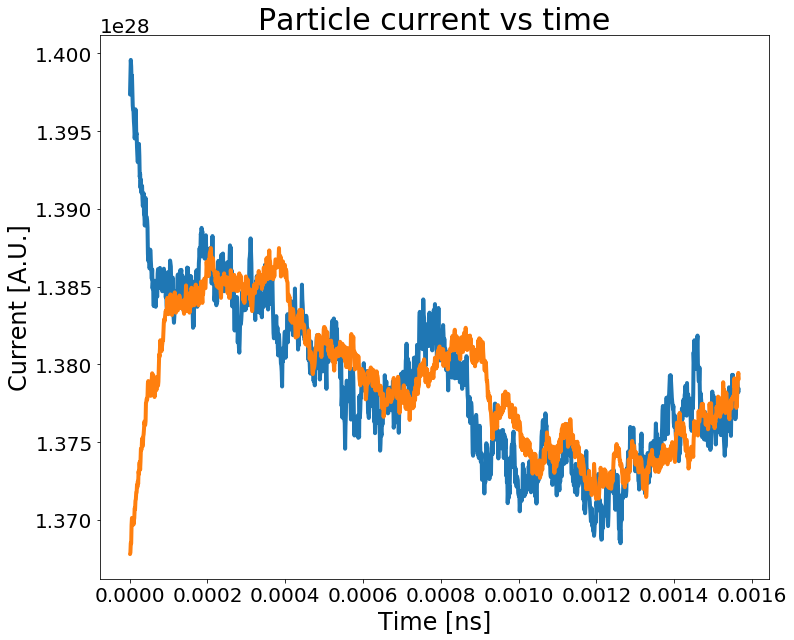

In [5]:
def plot_current(directory, box_size=200, color=None, ax=None):
    if (ax is None):
        fig = plt.figure(figsize=(12,10))
        ax = fig.add_subplot(1,1,1)
    filename = os.path.join(directory, "region_current.dat")
    current = np.loadtxt(filename)

    time = current[:,0]
    current = current[:,1:]
    
    assert (current.shape[0] > box_size), "box_size must be smaller than the number of time steps: {}".format(current.shape[0])

    # calculate and plot box average of the data
    box = np.ones(box_size)
    smooth_current = np.zeros((current.shape[0]-box.shape[0]+1,current.shape[1]))
    for i in range(0,current.shape[1]):
        smooth_current[:,i] = np.convolve(current[:,i], box, mode='valid')/np.sum(box)
        
    steady_current = np.average(current)
    print("steady state drain current: {:.6e}".format(steady_current))
    
    ax.plot(time[:smooth_current.shape[0]]*1.e9,(smooth_current[:,:]), linewidth=4, color=color)
    ax.set_title("Particle current vs time",fontsize=30)
    ax.set_xlabel("Time [ns]",fontsize=24)
    ax.set_ylabel("Current [A.U.]",fontsize=24)
    ax.tick_params(labelsize=20)
    return steady_current

current = []

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(1,1,1)
legends = []
for d in directories:
    c = plot_current(d, ax=ax, box_size=1000)
    current.append(c)
    legends.append(os.path.basename(d))

current = np.array(current)
# _ = ax.legend(legends, fontsize=14)
# ax.set_xlim([0,0.1])
# ax.set_ylim([-0, 300])


# Population profile versus time

length of population array: 2565
<class 'numpy.ndarray'>


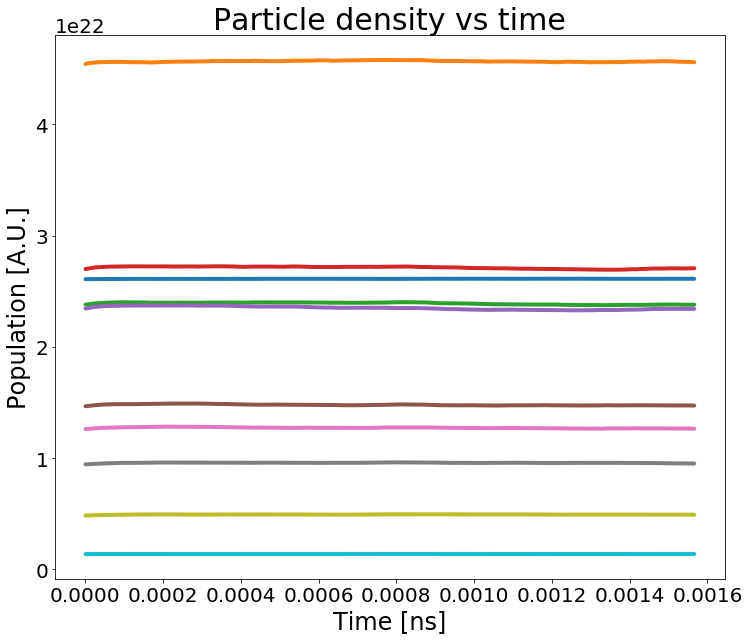

In [7]:
def plot_population_vs_time(directory, box_size=10, color=None, ax=None):
    if (ax is None):
        fig = plt.figure(figsize=(12,10))
        ax = fig.add_subplot(1,1,1)
    filename = os.path.join(directory, "population_profile.dat")
    df = pd.read_csv(filename, header=None, sep=' ')
    time = df.iloc[:,0].values
    population = df.iloc[:,1:11].values

    print(f"length of population array: {population.shape[0]}")
    
    assert (population.shape[0] > box_size), f"box_size must be smaller than the number of time steps: {population.shape[0]}"

    # calculate and plot box average of the data
    box = np.ones(box_size)
    smooth_population = np.zeros((population.shape[0]-box.shape[0]+1,population.shape[1]))
    for i in range(0,population.shape[1]):
        smooth_population[:,i] = np.convolve(population[:,i], box, mode='valid')/np.sum(box)
        
    print(type(smooth_population))
        
    ax.plot(time[:smooth_population.shape[0]]*1.e9,(smooth_population[:,:]), linewidth=4, color=color)
    _ = ax.set_title("Particle density vs time",fontsize=30)
    _ = ax.set_xlabel("Time [ns]",fontsize=24)
    _ = ax.set_ylabel("Population [A.U.]",fontsize=24)
    _ = ax.tick_params(labelsize=20)
    return ax

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(1,1,1)
_ = plot_population_vs_time(directories[0],ax=ax, box_size=1000)

# Population profile versus position

       position  population       density
0  5.000364e-09    0.049575  7.642164e+24
1  1.500022e-08    0.098340  1.515935e+25
2  2.500008e-08    0.064432  9.932316e+24
3  3.499993e-08    0.096765  1.491671e+25
4  4.499979e-08    0.104432  1.609848e+25
5  5.499965e-08    0.090559  1.395988e+25
6  6.499950e-08    0.114645  1.767283e+25
7  7.499936e-08    0.128156  1.975565e+25
8  8.499922e-08    0.122076  1.881837e+25
9  9.499907e-08    0.131021  2.019722e+25
[7.642164e+24 1.515935e+25 9.932316e+24 1.491671e+25 1.609848e+25
 1.395988e+25 1.767283e+25 1.975565e+25 1.881837e+25 2.019722e+25]
length of population array: 2565
average population: [3.41677645e-03 3.00656689e-03 2.40079695e-03 1.81336014e-03
 1.45469339e-03 1.05366594e-03 7.15028285e-04 4.80464019e-04
 2.59441121e-04 6.79395085e-05]
time: 1.2830000000000001
dn/dx = 3.72e+04



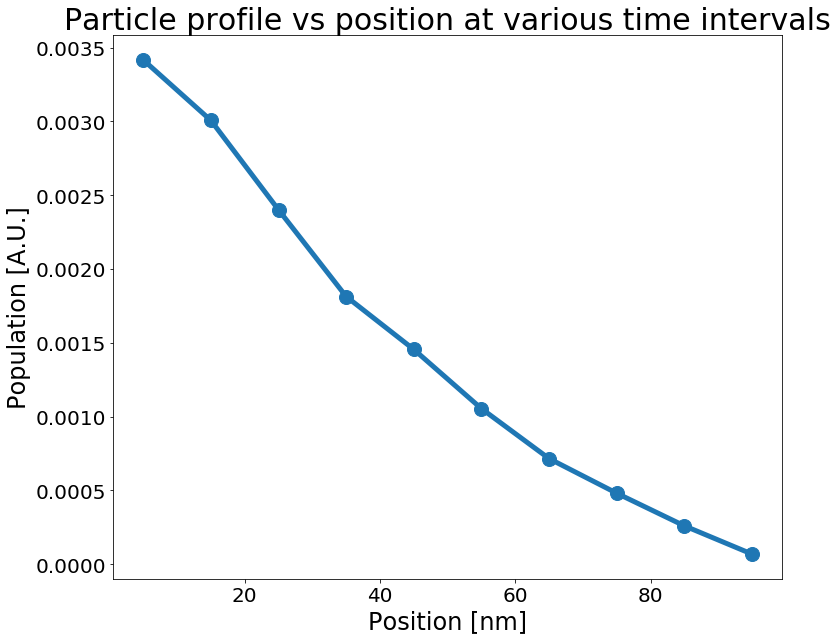

In [12]:
def plot_population_vs_position(directory, start=0, end=-1, color=None, ax=None):        
    filename = os.path.join(directory, "population_profile.dat")
    df = pd.read_csv(filename, header=None, sep=' ')
    time = df.iloc[:,0].values
    population = df.iloc[:,1:11].values
    
    filename = os.path.join(directory, "scatterer_distribution.dat")
    df = pd.read_csv(filename, delim_whitespace=True)
    print(df)
    distance = df['position'].values
    density = df['density'].values
    print(density)
    
    print(f"length of population array: {population.shape[0]}")
    
    avg_population = np.mean(population[start:end,:],0)
    avg_population = np.divide(avg_population,density)
    print(f"average population: {avg_population}")
    
    if (ax is None):
        fig = plt.figure(figsize=(12,10))
        ax = fig.add_subplot(1,1,1)
    ax.plot(distance*1.e9, avg_population, linewidth=5, marker='o', markersize=14, color=color)
    ax.set_title("Particle profile vs position",fontsize=30)
    ax.set_xlabel("Position [nm]",fontsize=24)
    ax.set_ylabel("Population [A.U.]",fontsize=24)
    ax.tick_params(labelsize=20)
    print("time: {}".format(np.mean(time[start:end])*1.e12))
    density_gradient = abs((avg_population[0]-avg_population[-1])/(distance[0]-distance[-1]))
    print("dn/dx = {:0.2e}\n".format(density_gradient))
    return density_gradient

density_gradient = np.array([])

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(1,1,1)
for d in directories:
    grad = plot_population_vs_position(d, start=1,end=-1,ax=ax)
    density_gradient = np.append(density_gradient,grad)

_ = ax.set_title("Particle profile vs position at various time intervals",fontsize=30)

# Calculate diffusion coefficient
$$ D = J/\big(\frac{dn}{dx}\big) $$
has units of [$\text{m}^2/\text{s}$]

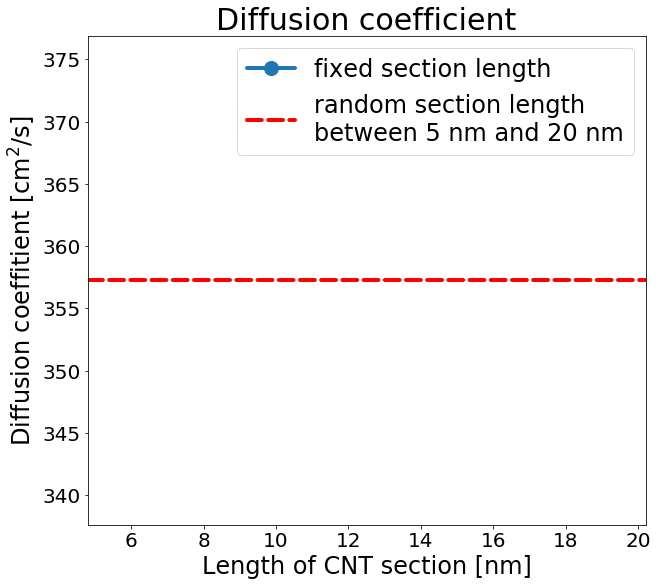

In [49]:
diff_coef = np.divide(current,density_gradient)
x_axis = np.array(range(len(diff_coef)))
# x_axis = np.array([5,10,15,20])

fig = plt.figure(figsize=(10,9))
ax = fig.add_subplot(1,1,1)
ax.plot(x_axis, diff_coef[:len(x_axis)]*1.e4, linewidth=4, marker='o', markersize='14')

ax.axhline(y=diff_coef[-1]*1.e4, linewidth=4, color='red', linestyle='dashed')

ax.set_title("Diffusion coefficient", fontsize=30)
ax.set_ylabel("Diffusion coeffitient [cm$^2$/s]",fontsize=24)
ax.set_xlabel("Length of CNT section [nm]",fontsize=24)
ax.tick_params(labelsize=20)
ax.set_xlim([4.8,20.2])
ax.legend(['fixed section length', 'random section length\nbetween 5 nm and 20 nm'], fontsize=24)

# Plot particle path

'file:///Users/amirhossein/research/monte_carlo_fiber/temp-pyplot.html'

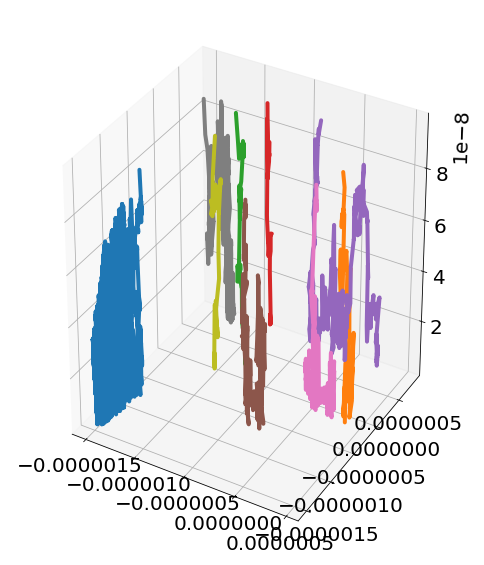

In [51]:
# directories = [os.path.expanduser("~/research/monte_carlo_fiber")]

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111,projection='3d')
data = []
for directory in directories:
    for i in range(11,20):
        filename = os.path.join(directory,"particle_path."+str(i)+".dat")
        if not os.path.exists(filename):
            continue
        x,y,z = np.loadtxt(filename, unpack=True)
        ax.plot(z, x, y)
        ax.set_aspect('equal')

        trace = go.Scatter3d(
            x=z, y=x, z=y,
            marker=dict(
                size=0,
                colorscale='Viridis',
            ),
            line=dict(
                width=1
            )
        )

        data.append(trace)


layout = dict(
    autosize=True,
    title='Iris dataset',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        camera=dict(
            up=dict(
                x=0,
                y=0,
                z=1
            ),
            eye=dict(
                x=-1.7428,
                y=1.0707,
                z=0.7100,
            )
        ),
        aspectratio = dict( x=1, y=1, z=0.03 ),
        aspectmode = 'manual'
    ),
)

fig = go.Figure(data=data, layout=layout)
plo.plot(fig,filename=os.path.join(directory,"temp-pyplot.html"))

# Perform statistical analysis of particle path

In [22]:
directories = [os.path.expanduser("~/research/monte_carlo_fiber_track_particle.1")]
directories += [os.path.expanduser("~/research/monte_carlo_fiber_track_particle.2")]
directories += [os.path.expanduser("~/research/monte_carlo_fiber_track_particle.3")]

for directory in directories:
    print(directory)
    xmean, ymean, zmean = [], [], []
    std = {'x':[],'y':[],'z':[]}
    for file in os.listdir(directory):
        if file.startswith("particle_path"):
            fullpath = os.path.join(directory,file)
            x,y,z = np.loadtxt(fullpath, unpack=True)
            xmean += np.mean(x)
            ymean += np.mean(y)
            zmean += np.mean(z)
            std['x'].append(np.std(x))
            std['y'].append(np.std(y))
            std['z'].append(np.std(z))
            
    std['x'] = np.array(std['x'])
    std['y'] = np.array(std['y'])
    std['z'] = np.array(std['z'])
    
    print("standard deviation is [{:1.2e},{:1.2e},{:1.2e}]".format(np.mean(std['x']), np.mean(std['y']), np.mean(std['z'])))


/Users/amirhossein/research/monte_carlo_fiber_track_particle.1
standard deviation is [5.00e-08,2.22e-08,4.83e-08]
/Users/amirhossein/research/monte_carlo_fiber_track_particle.2
standard deviation is [6.19e-08,2.14e-08,5.91e-08]
/Users/amirhossein/research/monte_carlo_fiber_track_particle.3
standard deviation is [6.96e-08,2.17e-08,1.36e-07]
